# Trail and Error of Finding Centroids In Practice

So far, the value of K we have used was known ahead of time. We knew the amount of classes that were contained in the dataset, and so we set the value appropriately. This will usually not be the case, and the decision will need to be made by looking at the data with a bit of trial and error.

To test by trial and error with clusters, we'll use a sample of the shopping dataset that contains customer data.

In [ ]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [ ]:
# Load data
file_path = "Resources/shopping_data_cleaned.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

See what the points look like at the start by entering the code. 

In [ ]:
df_shopping.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)")

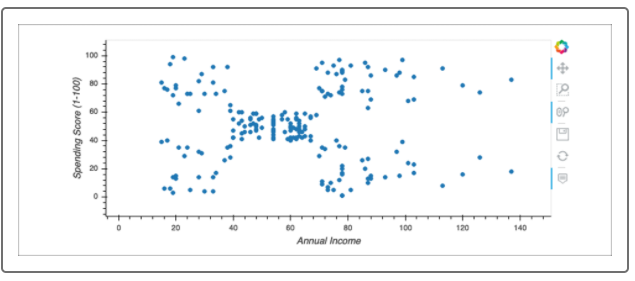

On first look, it may seem obvious the amount of clusters that would work, but let's see what happens when we start to cluster.

First, let's create a function so we can quickly run K-means on the DataFrame with a different amount of clusters by entering the following code:

In [ ]:
# Function to cluster and plot dataset
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)
    model

    # Fitting model
    model.fit(df)

    # Add a new class column to df_iris
    df["class"] = model.labels_

This function will take a DataFrame and the number of clusters to make as arguments. Start by running the function to create two clusters and then plot the results:

In [ ]:
test_cluster_amount(df_shopping, 2)
df_shopping.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)", by="class")
The graph will appear as follows:

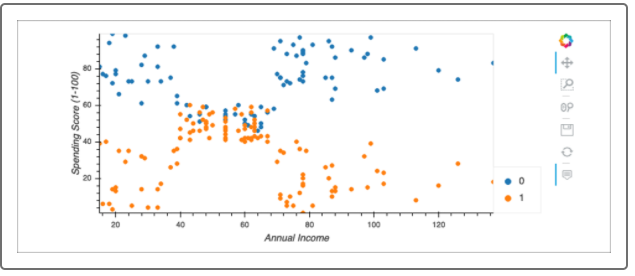

At first glance, two clusters look okay with some data points mixed in the middle.

## NOTE
Recall that sometimes plotting data with more than two data points in a 2D plot might show the true clustering.

Since there are some data points in the middle, let's plot the DataFrame with a third axis. Enter the code to create a 3D plot:

In [ ]:
fig = px.scatter_3d(
    df_shopping,
x="Annual Income",
    y="Spending Score (1-100)",
    z="Age",
color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

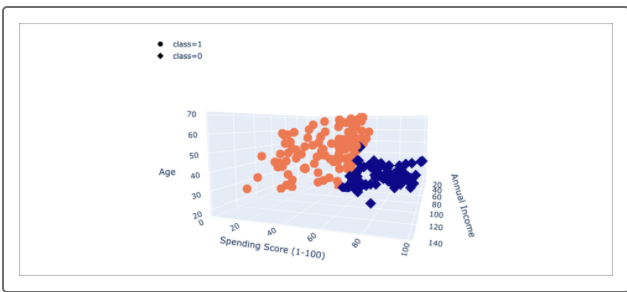

With the 3D plot, the cluster looks much better. Let's repeat the process a few more times and see what the different clusters look like.

Three clusters appear like so:

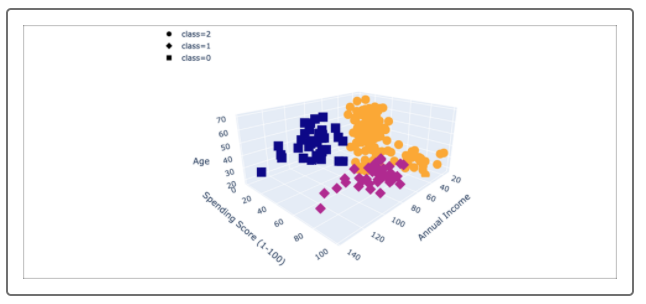

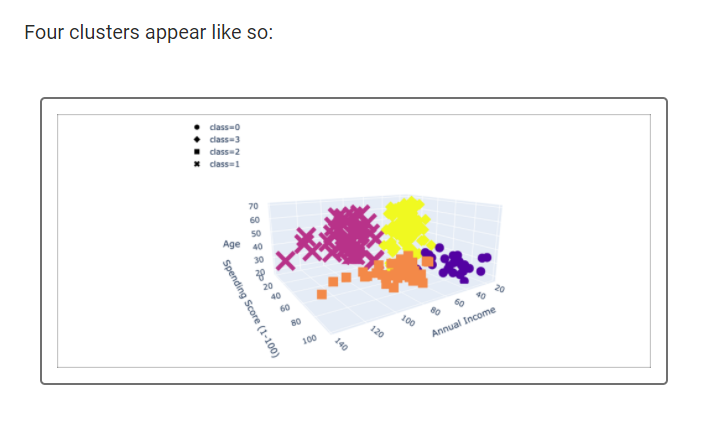

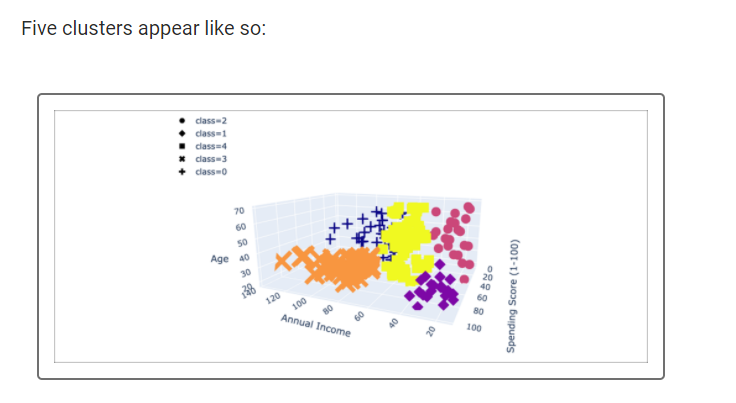

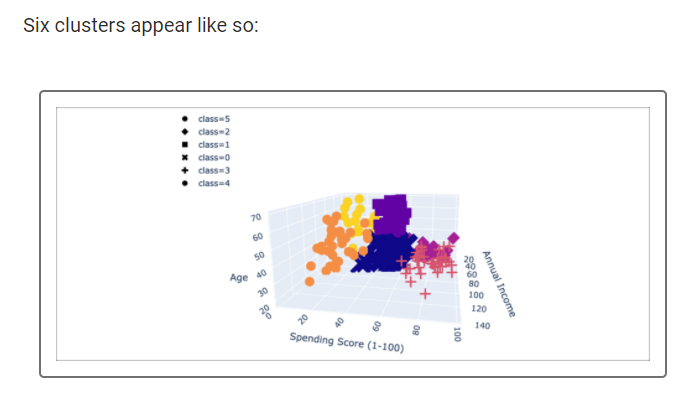

You might be thinking that each time we added more clusters, the graph looked better, so let's really go for it and split the data into seven clusters, like so:

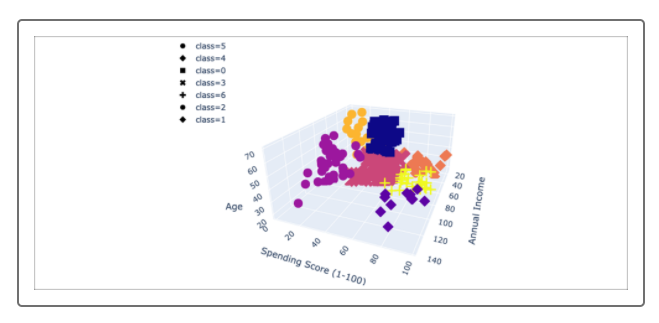

This also looks great! We're really starting to see some solid clusters break out. However, before we get trigger-happy and increase the clusters further, we should consider when there might be too many clusters.

If we have too many, will it even tell us something about the data? If we increase to 100 clusters, that would really fine-tune each group, but with so many clusters, can we even do anything with that?

Recall that unsupervised learning doesn't have a concrete outcome like supervised learning does. We use unsupervised learning to parse data to help us make decisions. So, at what point do we lose the helpfulness of unsupervised learning?

With trial and error, this can become unclear and can only get us so far with more complex datasets. In the next section, we'll learn a method that will help us determine the best value for K when clustering data.